In [1]:
import pandas as pd
df=pd.read_csv('2019.csv')
df.head()

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 9 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Overall rank                  156 non-null    int64  
 1   Country or region             156 non-null    object 
 2   Score                         156 non-null    float64
 3   GDP per capita                156 non-null    float64
 4   Social support                156 non-null    float64
 5   Healthy life expectancy       156 non-null    float64
 6   Freedom to make life choices  156 non-null    float64
 7   Generosity                    156 non-null    float64
 8   Perceptions of corruption     156 non-null    float64
dtypes: float64(7), int64(1), object(1)
memory usage: 11.1+ KB


In [3]:
df.isna().sum()

Overall rank                    0
Country or region               0
Score                           0
GDP per capita                  0
Social support                  0
Healthy life expectancy         0
Freedom to make life choices    0
Generosity                      0
Perceptions of corruption       0
dtype: int64

In [5]:
region_avg=df.groupby('Country or region')['Score'].mean().sort_values(ascending=False)
region_avg

Country or region
Finland                     7.769
Denmark                     7.600
Norway                      7.554
Iceland                     7.494
Netherlands                 7.488
                            ...  
Rwanda                      3.334
Tanzania                    3.231
Afghanistan                 3.203
Central African Republic    3.083
South Sudan                 2.853
Name: Score, Length: 156, dtype: float64

In [7]:
top_country=region_avg.head(1)
top_country

Country or region
Finland    7.769
Name: Score, dtype: float64

In [9]:
top5=region_avg.head(5)
top5

Country or region
Finland        7.769
Denmark        7.600
Norway         7.554
Iceland        7.494
Netherlands    7.488
Name: Score, dtype: float64

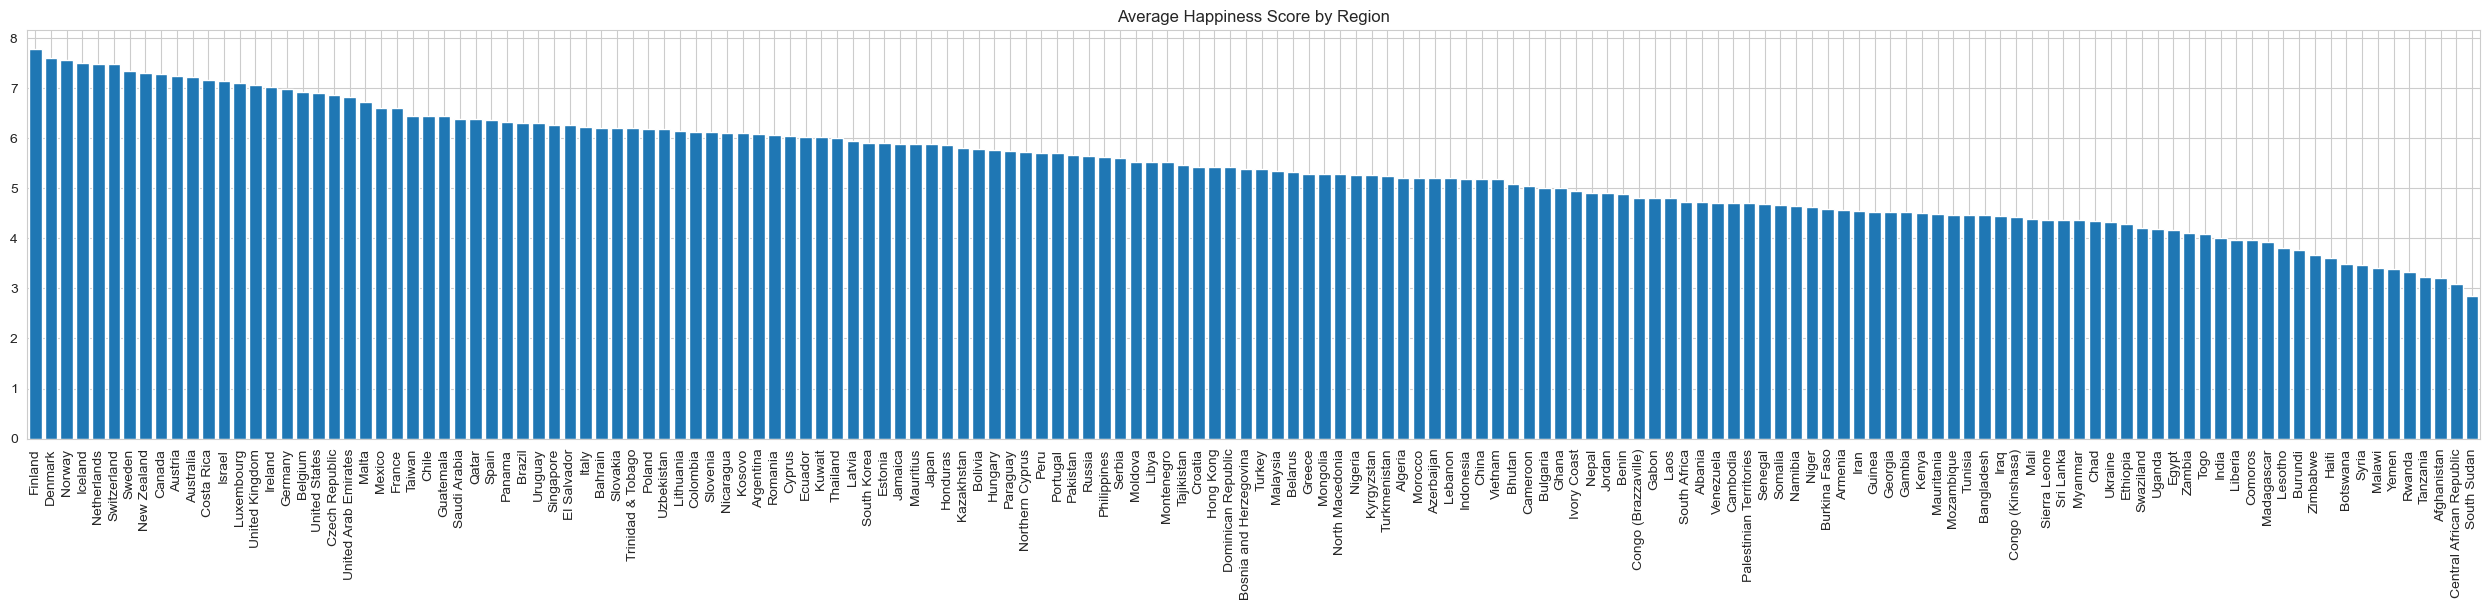

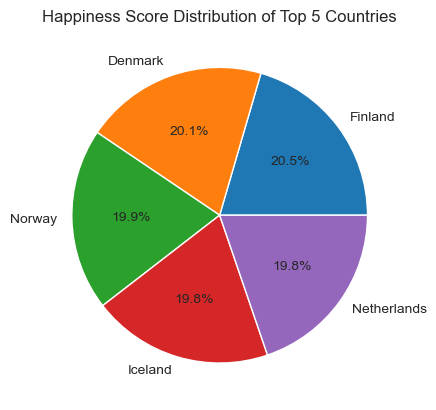

In [17]:
import matplotlib.pyplot as plt
plt.figure(figsize=(25, 6))
plt.bar(region_avg.index, region_avg.values)
plt.xlim(-0.5, len(region_avg) - 0.5)
plt.xticks(rotation=90)
plt.tight_layout()
plt.title("Average Happiness Score by Region")

top5 = df.nlargest(5, "Score")
plt.figure()
plt.pie(top5["Score"], labels=top5["Country or region"], autopct="%1.1f%%")
plt.title("Happiness Score Distribution of Top 5 Countries")
plt.show()